Today We Will Learn: **KNN (K-Nearest Neighbors)**

KNN is a **simple yet powerful algorithm** used for both **classification** and **regression**.  
In this notebook, we will focus on **KNN Regression** to predict **salary** based on **position level**.

We'll cover:

-  What is KNN and how it works  
-  Distance metrics: Euclidean, Manhattan, etc.  
-  How KNN predicts values by checking nearby data points  
-  How to use `KNeighborsRegressor` from `sklearn`  
-  Predicting salary for Level 6  
-  Hyperparameter tuning: trying different `n_neighbors`  
-  Comparing predicted vs. actual values  

Let's get started and explore how **"nearness" helps us predict better!**

**What is KNN?**

**KNN** stands for **K-Nearest Neighbors**.
It is a **supervised learning algorithm** used for both **classification** and **regression**.

* In **classification**, it predicts the class of a data point.
* In **regression**, it predicts a **continuous value** by averaging the values of its **K nearest neighbors**.

**How does KNN work?**

1. Measure the **distance** between a new point and all points in the training data.
2. Select the **K** closest (nearest) data points.
3. **For regression**: Take the **average** of their target values.
4. That average becomes the prediction.

**Distance Metrics**

| Name                        | Description                                                            |
| --------------------------- | ---------------------------------------------------------------------- |
| **Euclidean Distance (ED)** | Straight-line distance between 2 points. Most commonly used in KNN.    |
| **Manhattan Distance (MD)** | Distance by taking only horizontal/vertical paths (like city blocks).  |
| **Cosine Distance (CD)**    | Measures angle-based similarity. Often used in text/vector-based data. |

>  In our case (numeric data), we use **Euclidean Distance**.


# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Load dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\Lenovo\Downloads\emp_sal.csv")
dataset.head()

,Position,Level,Salary
0,Jr Software Engineer,1,45000
1,Sr Software Engineer,2,50000
2,Team Lead,3,60000
3,Manager,4,80000
4,Sr manager,5,110000


# Define Features and Target

In [3]:
X = dataset.iloc[:, 1:2].values  # Level (independent variable)
y = dataset.iloc[:, 2].values    # Salary (dependent variable)

# Train KNN Model (Default n\_neighbors=5)

In [4]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X, y)

KNeighborsRegressor()

# Predict for level 6

In [5]:
knn_pred = knn_reg.predict([[6]])
print("Predicted Salary (K=5):", knn_pred[0])

Predicted Salary (K=5): 168000.0


> It took the average salary of 5 nearest positions to level 6.

# Tune Hyperparameter `n_neighbors`

## Try with 3 neighbors

In [7]:
knn_reg3 = KNeighborsRegressor(n_neighbors=3)
knn_reg3.fit(X, y)

knn_pred3 = knn_reg3.predict([[6]])
print("Predicted Salary (K=3):", knn_pred3[0])

Predicted Salary (K=3): 153333.33333333334


**Closer to expected salary (\~150,000)**

## Visualize Predictions

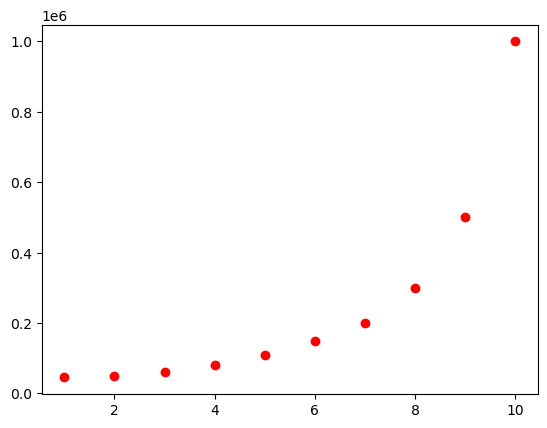

In [8]:
# Plot original data
plt.scatter(X, y, color='red', label='Actual Data')

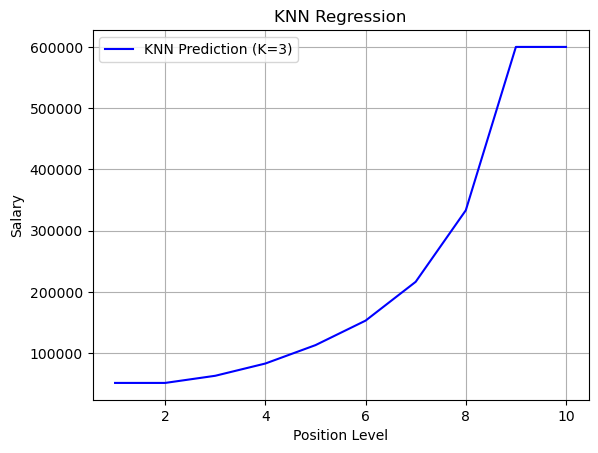

In [9]:
# Plot prediction line (not smooth, step-based)
plt.plot(X, knn_reg3.predict(X), color='blue', label='KNN Prediction (K=3)')

plt.title("KNN Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

**Summary Table**

| K (n\_neighbors) | Predicted Salary for Level 6 |
| ---------------- | ---------------------------- |
| 5 (default)      | 168000.00                    |
| 3                | 153333.33 ✅ Best match       |



# Final Conclusion

* KNN Regression is **easy to implement** and **non-parametric** (no assumption about data distribution).
* The prediction depends heavily on **K value** and **distance measure**.
* For our case, **K=3** gave the best salary estimate for Level 6 (\~153k).
* You can also explore other distance metrics (like Manhattan) and normalize data if needed.
